In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/archive (17).zip")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [32]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<ipython-input-35-ec64113ea4fe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_apps.values, y=top_10_apps.index, palette="coolwarm")


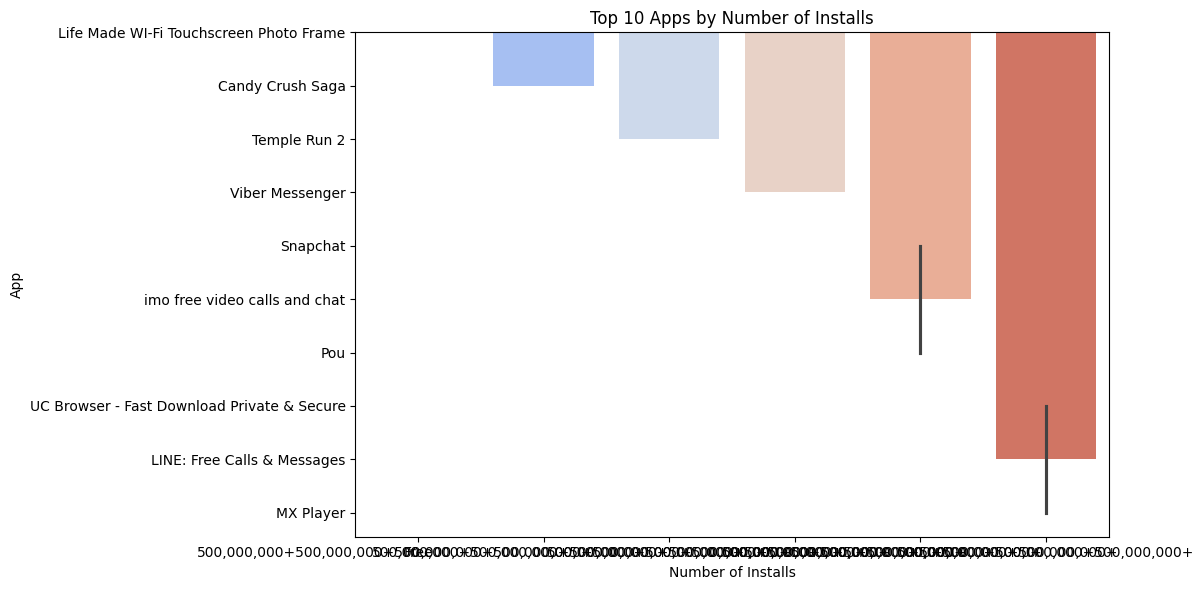

In [35]:
top_10_apps = df.groupby("App")["Installs"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_apps.values, y=top_10_apps.index, palette="coolwarm")
plt.xlabel("Number of Installs")
plt.ylabel("App")
plt.title("Top 10 Apps by Number of Installs")
plt.tight_layout()
plt.show()


<ipython-input-34-4c593e6a6f57>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y="App", order=top_10_apps, palette="coolwarm")


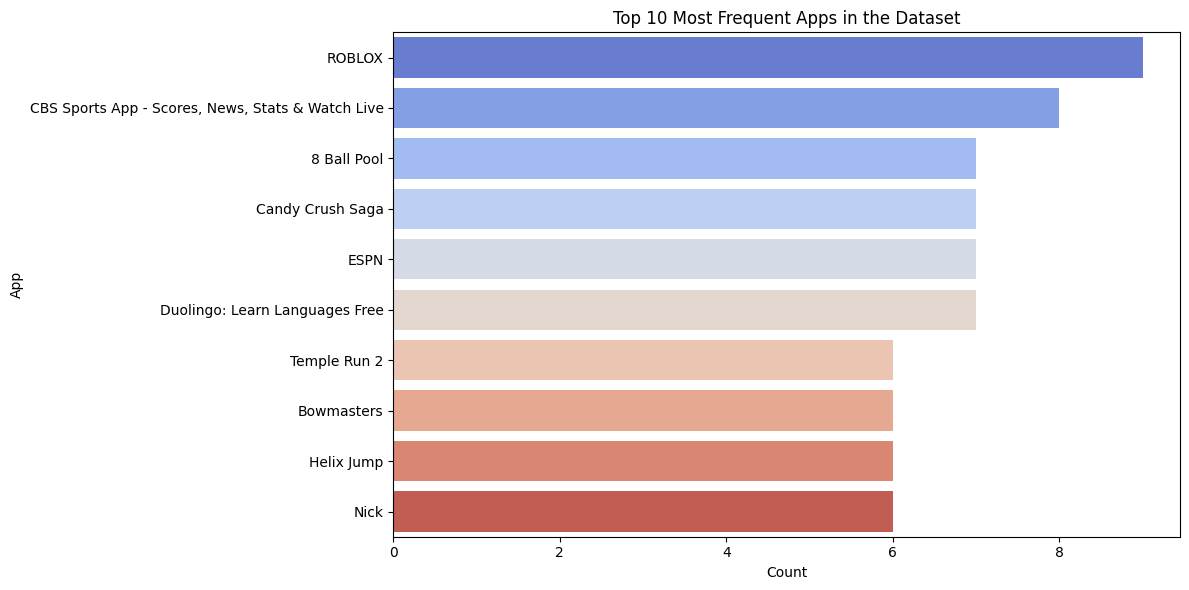

In [34]:
top_10_apps = df["App"].value_counts().head(10).index

# Filter the DataFrame for these top 10 apps
filtered_df = df[df["App"].isin(top_10_apps)]

# Plot countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, y="App", order=top_10_apps, palette="coolwarm")
plt.title("Top 10 Most Frequent Apps in the Dataset")
plt.xlabel("Count")
plt.ylabel("App")
plt.tight_layout()
plt.show()

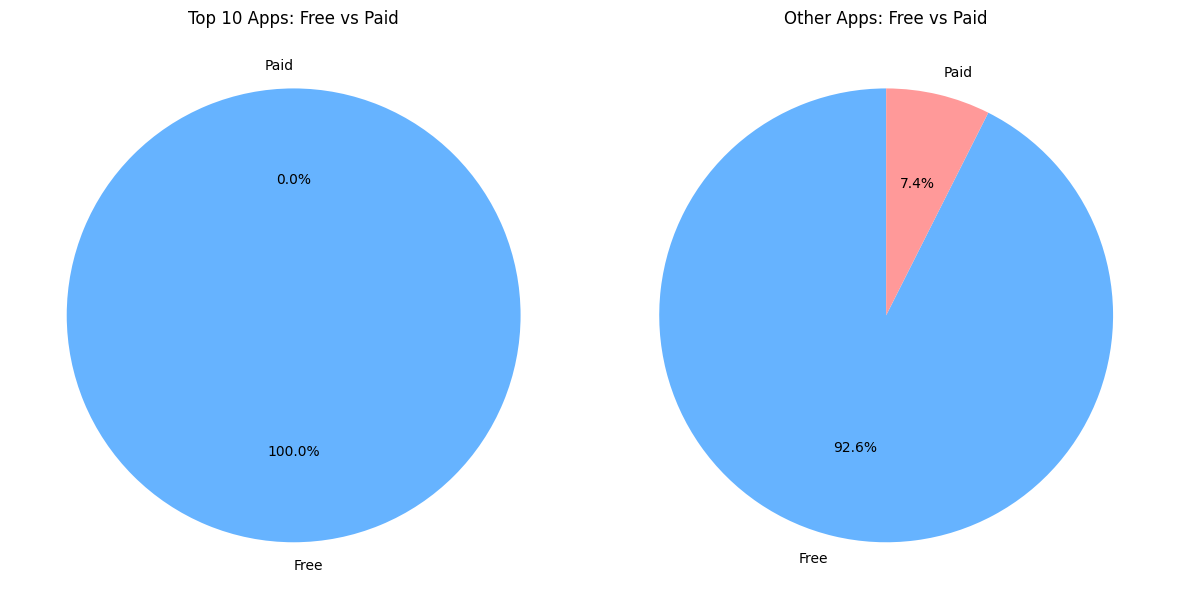

In [37]:
# Identify top 10 most frequent apps
top_10_apps = df["App"].value_counts().head(10).index
filtered_df = df[df["App"].isin(top_10_apps)]
other_apps_df = df[~df["App"].isin(top_10_apps)]

# Type distribution for both groups
type_distribution_top10 = filtered_df["Type"].value_counts(normalize=True) * 100
type_distribution_others = other_apps_df["Type"].value_counts(normalize=True) * 100

# Prepare data for plotting
labels = ['Free', 'Paid']
top10_sizes = [type_distribution_top10.get("Free", 0), type_distribution_top10.get("Paid", 0)]
other_sizes = [type_distribution_others.get("Free", 0), type_distribution_others.get("Paid", 0)]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Top 10 Apps
axes[0].pie(top10_sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
axes[0].set_title('Top 10 Apps: Free vs Paid')

# Pie chart for Other Apps
axes[1].pie(other_sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
axes[1].set_title('Other Apps: Free vs Paid')

plt.tight_layout()
plt.show()

In [41]:
df["Reviews"].value_counts()

,count
Reviews,
0,596
1,272
2,214
3,175
4,137
...,...
4272,1
5517,1
4057,1


In [39]:
df["Reviews"] = df["Reviews"].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

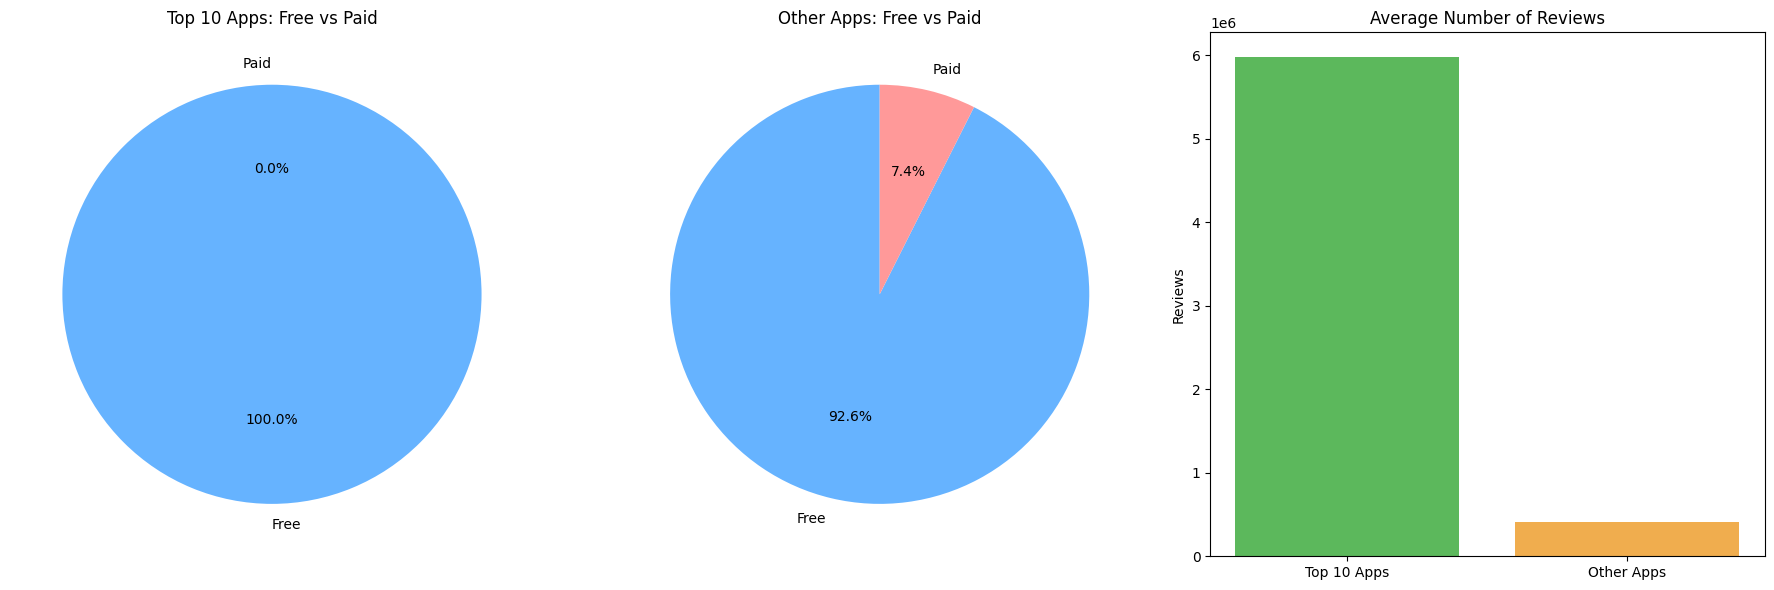

In [44]:
top_10_apps = df["App"].value_counts().head(10).index
filtered_df = df[df["App"].isin(top_10_apps)]
other_apps_df = df[~df["App"].isin(top_10_apps)]

# Type distribution for pie charts
type_distribution_top10 = filtered_df["Type"].value_counts(normalize=True) * 100
type_distribution_others = other_apps_df["Type"].value_counts(normalize=True) * 100

# Pie chart data
labels = ['Free', 'Paid']
top10_sizes = [type_distribution_top10.get("Free", 0), type_distribution_top10.get("Paid", 0)]
other_sizes = [type_distribution_others.get("Free", 0), type_distribution_others.get("Paid", 0)]

# Bar chart data for reviews
avg_reviews_top10 = filtered_df["Reviews"].mean()
avg_reviews_others = other_apps_df["Reviews"].mean()

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for Top 10 Apps
axes[0].pie(top10_sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
axes[0].set_title('Top 10 Apps: Free vs Paid')

# Pie chart for Other Apps
axes[1].pie(other_sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
axes[1].set_title('Other Apps: Free vs Paid')

# Bar chart for average reviews
axes[2].bar(['Top 10 Apps', 'Other Apps'], [avg_reviews_top10, avg_reviews_others], color=['#5cb85c', '#f0ad4e'])
axes[2].set_title('Average Number of Reviews')
axes[2].set_ylabel('Reviews')

plt.tight_layout()
plt.show()

In [42]:
def convert_reviews(x):
    if isinstance(x, str):
        x = x.replace(',', '')  # Remove commas
        if 'M' in x:
            return int(float(x.replace('M', '')) * 1_000_000)
        elif 'K' in x:
            return int(float(x.replace('K', '')) * 1_000)
    try:
        return int(x)
    except:
        return None

# Apply conversion
df['Reviews'] = df['Reviews'].apply(convert_reviews)

# Drop rows with invalid reviews
df = df[df['Reviews'].notnull()]
df['Reviews'] = df['Reviews'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [31]:
df["Price"].value_counts()

,count
Price,
0,10040
$0.99,148
$2.99,129
$1.99,73
$4.99,72
...,...
$394.99,1
$1.26,1
Everyone,1


In [14]:
df["Genres"].value_counts()

,count
Genres,
Tools,842
Entertainment,623
Education,549
Medical,463
Business,460
...,...
Strategy;Education,1
Racing;Pretend Play,1
Communication;Creativity,1


In [7]:
df["App"].nunique()

9660

In [18]:
x.sort_values(ascending = False).head(5)

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460


In [11]:
x = df["Category"].value_counts()

In [22]:
# Step 1: Get top 5 categories
top_5_categories = df["Category"].value_counts().head(5).index

# Step 2: Filter DataFrame for top 5 categories
filtered_df = df[df["Category"].isin(top_5_categories)]

# Step 3: Group by Category and Genres, then count apps
grouped = filtered_df.groupby(["Category", "Genres"]).size().reset_index(name="App Count")

# Step 4: Sort to see most common genres within top categories
grouped_sorted = grouped.sort_values(by=["Category", "App Count"], ascending=[True, False])

# Display result
grouped_sorted


,Category,Genres,App Count
0,BUSINESS,Business,460
38,FAMILY,Entertainment,487
25,FAMILY,Education,420
62,FAMILY,Simulation,189
17,FAMILY,Casual,148
...,...,...,...
92,GAME,Simulation;Action & Adventure,1
93,GAME,Simulation;Education,1
98,MEDICAL,Medical,463
99,TOOLS,Tools,842


In [23]:
# Filter the grouped data to show only the 'FAMILY' category
family_group = grouped_sorted[grouped_sorted["Category"] == "FAMILY"]

# Display the result
family_group


,Category,Genres,App Count
38,FAMILY,Entertainment,487
25,FAMILY,Education,420
62,FAMILY,Simulation,189
17,FAMILY,Casual,148
50,FAMILY,Puzzle,98
...,...,...,...
60,FAMILY,Role Playing;Education,1
69,FAMILY,Strategy;Creativity,1
70,FAMILY,Strategy;Education,1
71,FAMILY,Trivia;Education,1


In [8]:
df["Category"].nunique()

34

In [33]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.shape

(10841, 13)

<Axes: title={'center': 'Average Rating per Category'}, xlabel='Category'>

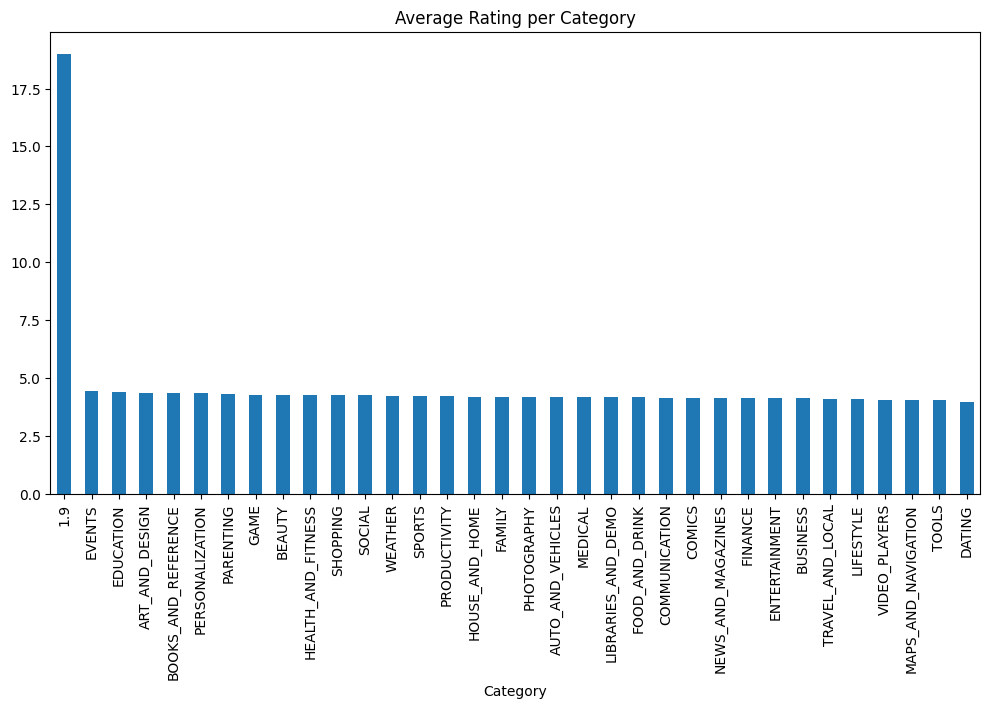

In [24]:
avg_rating = df.groupby("Category")["Rating"].mean().sort_values(ascending=False)
avg_rating.plot(kind="bar", figsize=(12, 6), title="Average Rating per Category")


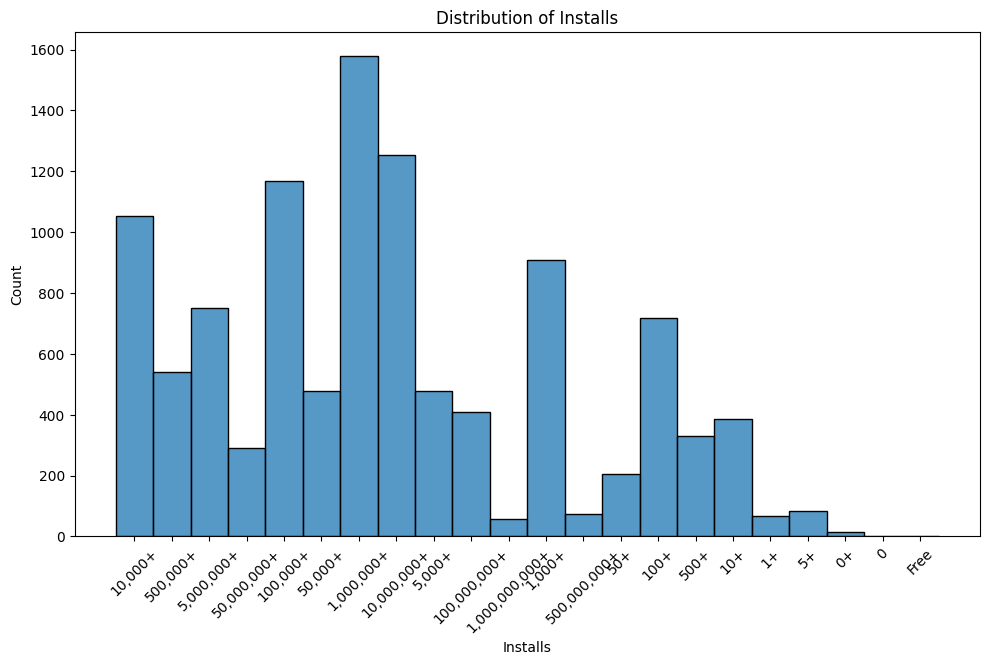

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df["Installs"], bins=30, log_scale=True)
plt.title("Distribution of Installs")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Content Rating Distribution'}, ylabel='count'>

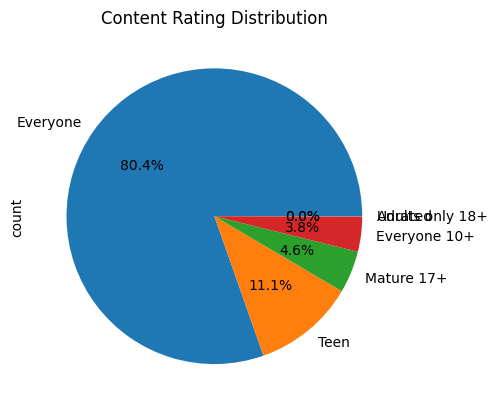

In [30]:
df["Content Rating"].value_counts().plot(kind="pie", autopct='%1.1f%%', title="Content Rating Distribution")


Data Cleaning

In [7]:
# step-1: Copy the original DataFrame to avoid mutation
df_clean = df.copy()

In [8]:
# Step 2: Clean 'Reviews' column (convert to numeric)
df_clean['Reviews'] = pd.to_numeric(df_clean['Reviews'], errors='coerce')

In [9]:
# Step 3: Clean 'Installs' column (remove '+' and ',' then convert to int)
df_clean['Installs'] = df_clean['Installs'].str.replace('[+,]', '', regex=True)
df_clean['Installs'] = pd.to_numeric(df_clean['Installs'], errors='coerce')

In [13]:
# Step 4: Clean 'Price' column (remove '$' and convert to float)
# Convert the 'Price' column to string type first, if it's not already.
df_clean['Price'] = df_clean['Price'].astype(str)
df_clean['Price'] = df_clean['Price'].str.replace('$', '', regex=False)
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')

In [14]:
# Step 5: Convert 'Size' column to a uniform numeric format (in MB)
def convert_size(size):
    if size.endswith('M'):
        return float(size[:-1])
    elif size.endswith('k'):
        return float(size[:-1]) / 1024  # Convert KB to MB
    elif size == 'Varies with device':
        return None
    else:
        return None

df_clean['Size'] = df_clean['Size'].apply(lambda x: convert_size(str(x)))

In [15]:
# Step 6: Remove rows with missing 'App' name or 'Category'
df_clean.dropna(subset=['App', 'Category'], inplace=True)

In [16]:
# Step 7: Handle missing values in 'Rating' using median
df_clean['Rating'].fillna(df_clean['Rating'].median(), inplace=True)

<ipython-input-16-1a229461580d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Rating'].fillna(df_clean['Rating'].median(), inplace=True)


In [17]:
# Step 8: Drop any remaining rows with critical missing values (optional)
df_clean.dropna(subset=['Type', 'Content Rating', 'Android Ver'], inplace=True)

In [19]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Univariate Analysis

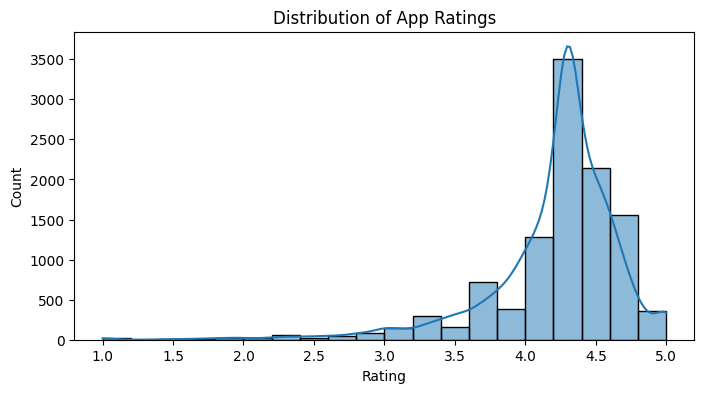

In [20]:
# Plot distribution of Ratings
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

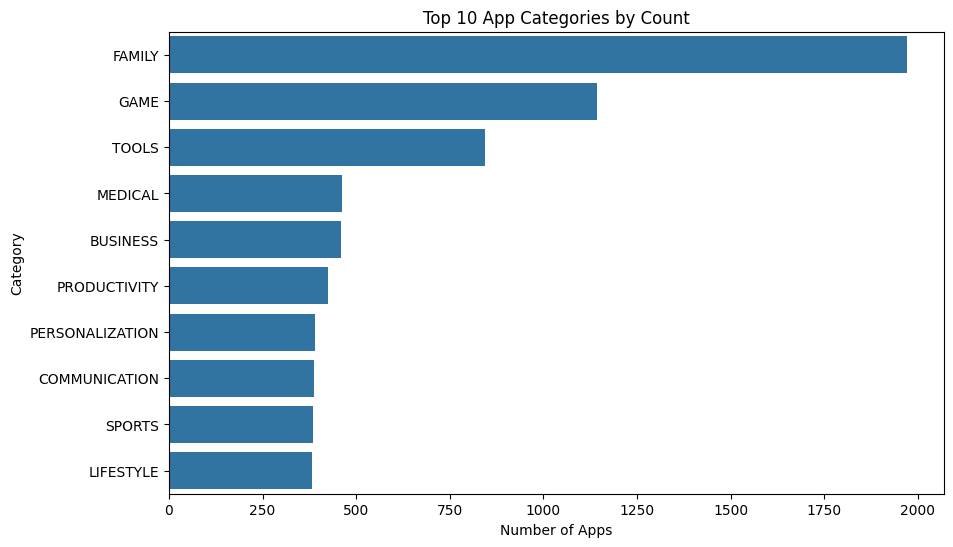

In [21]:
# Plot top 10 Categories by count
plt.figure(figsize=(10, 6))
top_categories = df_clean['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 App Categories by Count')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

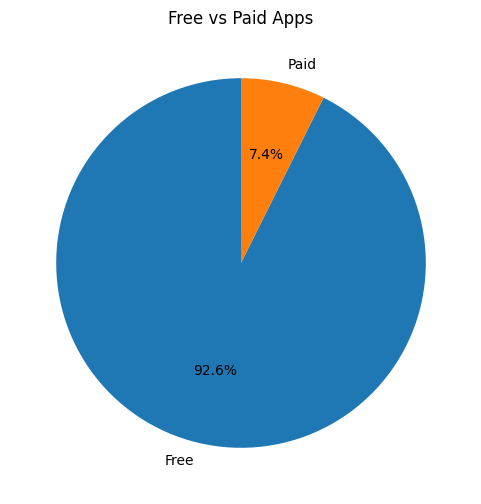

In [22]:
# Pie chart of Free vs Paid apps
plt.figure(figsize=(6, 6))
df_clean['Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Free vs Paid Apps')
plt.ylabel('')
plt.show()

Bivariate/Multivariate Analysis

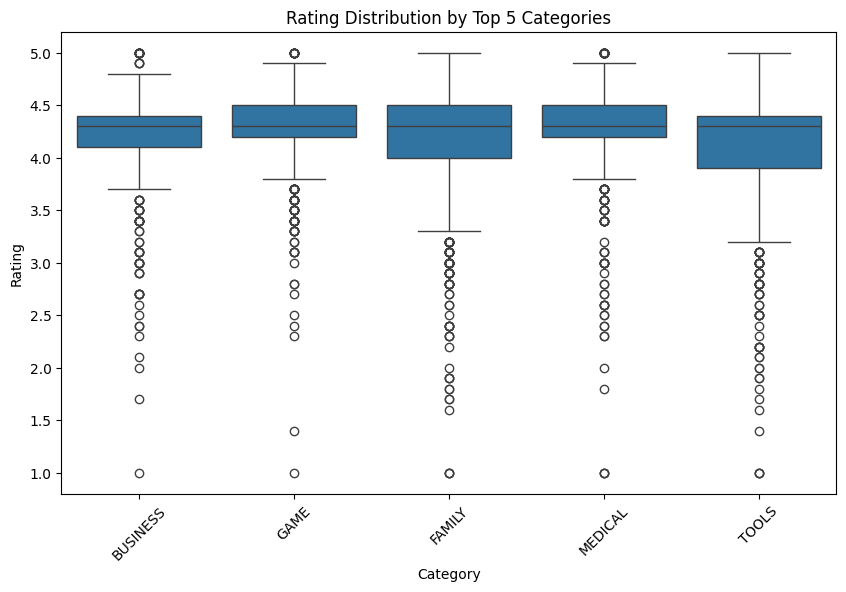

In [23]:
# Boxplot: Rating by Category (top 5 categories for clarity)
top5_cats = df_clean['Category'].value_counts().head(5).index
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Rating', data=df_clean[df_clean['Category'].isin(top5_cats)])
plt.title('Rating Distribution by Top 5 Categories')
plt.xticks(rotation=45)
plt.show()

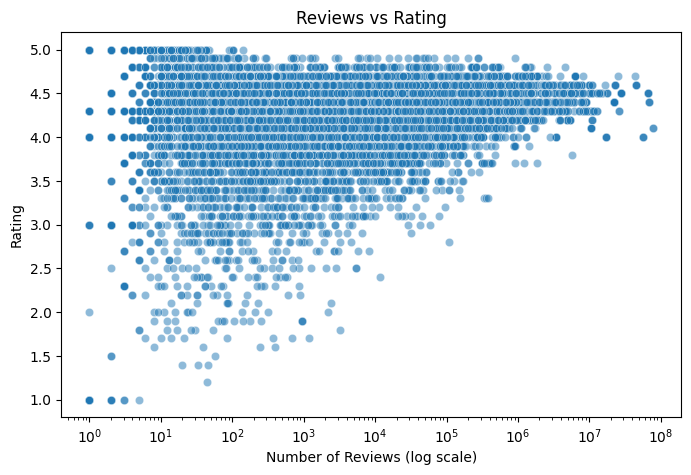

In [24]:
# Scatter plot: Reviews vs Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Reviews', y='Rating', data=df_clean, alpha=0.5)
plt.title('Reviews vs Rating')
plt.xscale('log')
plt.xlabel('Number of Reviews (log scale)')
plt.ylabel('Rating')
plt.show()

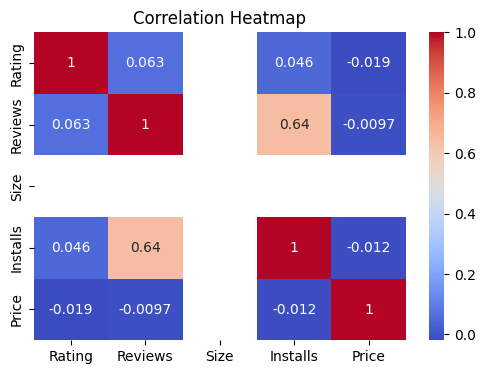

In [25]:
# Correlation heatmap (numerical features)
plt.figure(figsize=(6, 4))
sns.heatmap(df_clean[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Outlier Detection

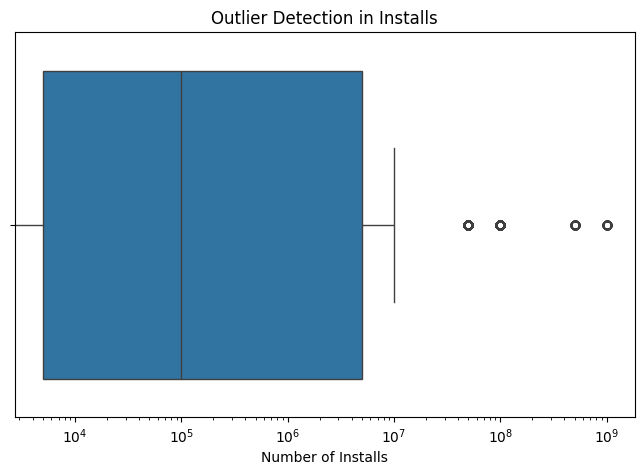

In [26]:
# Boxplot to detect outliers in Installs
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['Installs'])
plt.title('Outlier Detection in Installs')
plt.xlabel('Number of Installs')
plt.xscale('log')
plt.show()

Summary of Insights

Key Insights Summary:
1. Most apps are free (~92%).
2. The majority of apps are in the 'FAMILY', 'GAME', and 'TOOLS' categories.
3. Higher reviews often correlate with higher installs, but not necessarily with higher ratings.
4. Some categories have more consistent high ratings (e.g., 'BOOKS_AND_REFERENCE', 'EDUCATION').
5. Outliers exist in installs and reviews, especially among highly popular apps.

Questions Framed

1.Which app categories have the highest average rating?

- Goal: Help developers understand which categories are more appreciated by users.

In [28]:
df_clean.groupby('Category')['Rating'].mean().sort_values(ascending=False)

,Rating
Category,
EVENTS,4.395313
EDUCATION,4.388462
ART_AND_DESIGN,4.355385
BOOKS_AND_REFERENCE,4.335498
PERSONALIZATION,4.328205
PARENTING,4.300000
GAME,4.286888
BEAUTY,4.283019
HEALTH_AND_FITNESS,4.280059


2. Which app genres are most popular in terms of installs?

   - Goal: Guide new developers on what types of apps have larger audiences.

In [35]:
df_clean.groupby('Genres')['Installs'].mean().sort_values(ascending=False)

,Installs
Genres,
Communication,8.435989e+07
Adventure;Action & Adventure,6.970385e+07
Casual,5.006648e+07
Arcade,4.875968e+07
Social,4.769447e+07
...,...
Books & Reference;Education,5.500000e+03
Board;Pretend Play,1.000000e+02
Books & Reference;Creativity,1.000000e+02


3. Which content ratings (Everyone, Teen, Mature 17+, etc.) have the highest-rated apps?

   - Goal: Analyze audience-based performance.

In [37]:
df_clean.groupby('Content Rating')['Rating'].mean()

,Rating
Content Rating,
Adults only 18+,4.300000
Everyone,4.203191
Everyone 10+,4.258838
Mature 17+,4.136874
Teen,4.240315
Unrated,4.200000


Observation:

 *Core Insights*

1. *Most apps are free, but free doesn’t always mean popular or well-rated.*
   - Free apps dominate (~90%+), but not all perform well in terms of installs or ratings.

2. *Certain categories consistently perform better.*
   - Categories like Education, Books, and Productivity tend to have higher average ratings.
   - Categories like Games and Tools have more installs, showing popularity.

3. *Higher number of installs doesn’t always mean higher user satisfaction.*
   - Some widely installed apps have mediocre ratings, showing that quality and reach aren’t always aligned.

4. *Paid apps do not guarantee better ratings.*
   - Many paid apps are niche and not highly rated, indicating users expect more when they pay.

5. *App size and reviews influence popularity, but not ratings directly.*
   - Larger apps tend to have more installs, but size doesn’t clearly correlate with rating.
   - More reviews typically signal popularity, not necessarily better quality.